In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

# pietro
data_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/data_weather_osm.csv")
# carlo
#data_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/data_weather_osm.csv")
# marco
#data_weather_osm = pd.read_csv("/content/drive/My Drive/Progetto AML/data_weather_osm.csv")

data_weather_osm = data_weather_osm.drop(columns=['date', 'id', 'pickup_datetime', 'dropoff_datetime', 'starting_street', 'end_street', 'street_for_each_step', 'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 'step_direction', 'step_location_list'])

data_weather_osm.shape

(1458643, 24)

#Preprocessing

###Eliminazione outlier coordinate

In [0]:
import numpy as np
# pickup media e std
mean_pickup_longitude = np.mean(data_weather_osm.pickup_longitude, axis=0)
std_pickup_longitude = np.std(data_weather_osm.pickup_longitude, axis=0)

mean_pickup_latitude = np.mean(data_weather_osm.pickup_latitude, axis=0)
std_pickup_latitude = np.std(data_weather_osm.pickup_latitude, axis=0)

# dropoff media e std
mean_dropoff_longitude = np.mean(data_weather_osm.dropoff_longitude, axis=0)
std_dropoff_longitude = np.std(data_weather_osm.dropoff_longitude, axis=0)

mean_dropoff_latitude = np.mean(data_weather_osm.dropoff_latitude, axis=0)
std_dropoff_latitude = np.std(data_weather_osm.dropoff_latitude, axis=0)


In [0]:
#dati che eliminiamo rispetto a pickup

multiplier = 5

data_delete_1 = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude - multiplier * std_pickup_longitude]
data_delete_2 = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude + multiplier * std_pickup_longitude]

data_delete_3 = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude - multiplier * std_pickup_latitude]
data_delete_4 = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude + multiplier * std_pickup_latitude]

data_delete = pd.concat([data_delete_1, data_delete_2, data_delete_3, data_delete_4])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(315, 24)

In [0]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
number_point = 1400
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].pickup_latitude, data_delete.iloc[i].pickup_longitude], radius=1).add_to(m)
m

In [0]:
#dati che eliminiamo rispetto a dropoff

#(soglia)
multiplier = 5

data_delete_5 = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_delete_6 = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_delete_7 = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_delete_8 = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude + multiplier * std_dropoff_latitude]

data_delete = pd.concat([data_delete_5, data_delete_6, data_delete_7, data_delete_8])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(973, 24)

In [0]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].dropoff_latitude, data_delete.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)
m

In [0]:
# elimino le tuple outlier in base a pickup_longitude
#(soglia)
multiplier = 5

data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude - multiplier * std_pickup_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude + multiplier * std_pickup_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude - multiplier * std_pickup_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude + multiplier * std_pickup_latitude]

# elimino le tuple outlier in base a dropoff_longitude
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude + multiplier * std_dropoff_latitude]

# con -2*std elimino 103.835
# con -3*std elimino 48.725
# con -4*str elimino 3.720
data_weather_osm.shape

(1457608, 24)

###Eliminazione outlier

In [0]:
data_weather_osm[data_weather_osm.trip_duration >= 36000].shape[0]

2010

In [0]:
# elimino i viaggi più di lunghi di 5 ore? o li togliamo di più
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration < 18000]

In [0]:
# elimino i viaggi con 0 persone sono 60
data_weather_osm = data_weather_osm[data_weather_osm.passenger_count != 0]

In [0]:
# check if there are trips with duration less than 30 seconds
data_weather_osm[data_weather_osm.trip_duration <= 30].shape[0]

4764

In [0]:
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration > 30]

In [0]:
data_weather_osm.shape

(1450717, 24)

In [0]:
data_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,2009.1,164.9,5.0,10.555556,4.444444,7.500000,0.7366,0.0,0.00,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,False,False,False,False,17,24,0
1,2513.2,332.0,6.0,7.777778,2.777778,5.277778,0.8890,0.0,0.00,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,False,False,False,False,0,43,6
2,1779.4,235.8,4.0,28.333333,18.888889,23.611111,1.0160,0.0,0.00,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,False,False,False,False,19,32,2
3,1614.9,140.1,5.0,12.777778,3.333333,8.055556,0.0000,0.0,0.00,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,False,False,False,False,13,30,5
4,1393.5,189.4,5.0,3.888889,-2.222222,0.833333,0.0000,0.0,15.24,2,6,-73.982857,40.742195,-73.992081,40.749184,N,443,False,False,False,False,22,1,5


###Preparazione per keras

In [0]:
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = '0'
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = '1'


In [0]:
# si può provare ad eliminare le coordinate gps
data_weather_osm= data_weather_osm.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [0]:
data_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,2009.1,164.9,5.0,10.555556,4.444444,7.500000,0.7366,0.0,0.00,2,1,0,455,False,False,False,False,17,24,0
1,2513.2,332.0,6.0,7.777778,2.777778,5.277778,0.8890,0.0,0.00,1,1,0,663,False,False,False,False,0,43,6
2,1779.4,235.8,4.0,28.333333,18.888889,23.611111,1.0160,0.0,0.00,2,1,0,429,False,False,False,False,19,32,2
3,1614.9,140.1,5.0,12.777778,3.333333,8.055556,0.0000,0.0,0.00,2,1,0,435,False,False,False,False,13,30,5
4,1393.5,189.4,5.0,3.888889,-2.222222,0.833333,0.0000,0.0,15.24,2,6,0,443,False,False,False,False,22,1,5


In [0]:
data_weather_osm.shape

(1450717, 20)

###Matrice di correlazione

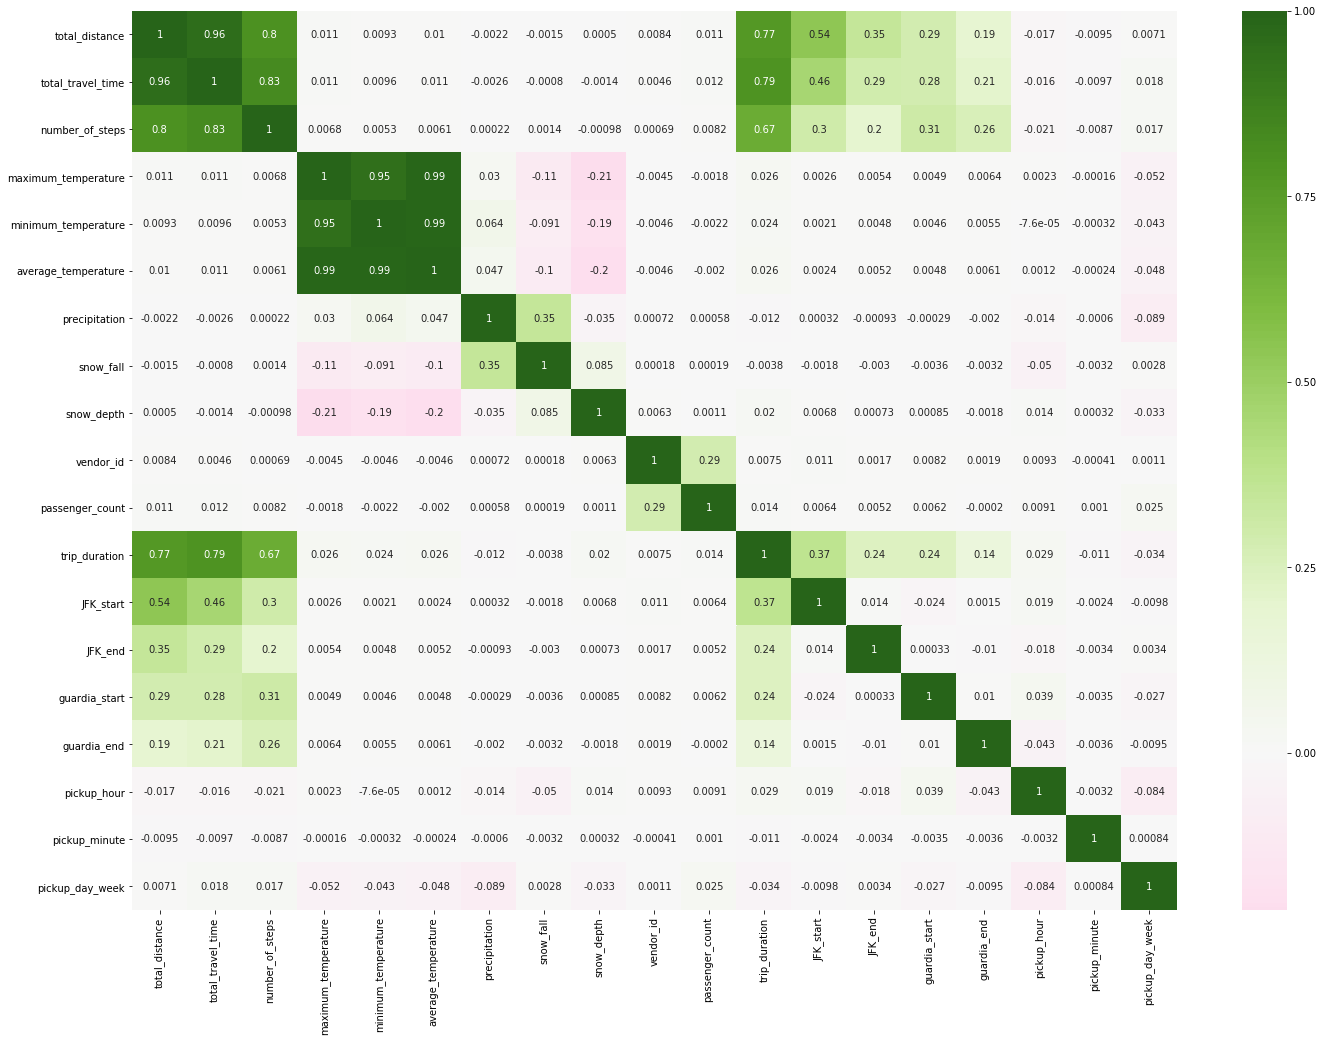

In [0]:
import seaborn as sn
from matplotlib import pyplot
corrMatrix = data_weather_osm.corr()

fig, ax = pyplot.subplots(figsize=(23.4, 16.54))
ax = sn.heatmap(corrMatrix, annot=True, cmap="PiYG", center=0)
pyplot.show()
ax.get_figure().savefig('/content/correlation.png')


#keras

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

cols = list(data_weather_osm.columns.values)
cols.remove('trip_duration')

target = data_weather_osm.loc[:, 'trip_duration']
features = data_weather_osm.loc[:, cols]

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

In [0]:
train_scaled_x

array([[0.02055376, 0.05599186, 0.04545455, ..., 0.30434783, 0.98305085,
        1.        ],
       [0.0468787 , 0.0832406 , 0.11363636, ..., 0.47826087, 0.98305085,
        0.5       ],
       [0.06065796, 0.0952275 , 0.13636364, ..., 0.17391304, 0.30508475,
        0.66666667],
       ...,
       [0.04801143, 0.08692887, 0.11363636, ..., 0.43478261, 0.57627119,
        0.16666667],
       [0.03242217, 0.06565769, 0.06818182, ..., 0.86956522, 0.76271186,
        0.        ],
       [0.0374959 , 0.0916664 , 0.04545455, ..., 0.7826087 , 0.72881356,
        0.5       ]])

### First model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#create model
model = Sequential()
num_features = train_scaled_x.shape[1]


print(num_features, 'dims')

#add model layers
model.add(Dense(8, input_dim=num_features, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine'])

model.summary()

19 dims
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 8)                 160       
_________________________________________________________________
dense_86 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_87 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 65        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


### Second model

In [0]:
# another model
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.layers import Dense, Dropout

num_features = train_scaled_x.shape[1]

model = Sequential()
model.add(Dense(units=100, input_dim=num_features, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.5))

model.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.4))

model.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.3))

model.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               2200      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 100)               100       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 40)                4040      
_________________________________________________________________
batch_normalization_5 (Batch (None, 40)                160       
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 40)               

#Third

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

#create model
model = Sequential()
num_features = train_scaled_x.shape[1]


print(num_features, 'dims')

#add model layers
model.add(Dense(16, input_dim=num_features, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine'])

model.summary()

19 dims
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 16)                320       
_________________________________________________________________
dense_90 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_91 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 65        
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


### After the model definition

In [0]:
history = model.fit(train_scaled_x, np.log(train_y + 1), epochs=5, 
          batch_size=128, verbose=True)

Epoch 1/5
1160573/1160573 [==============================] - 20s 17us/step - loss: 0.3794 - mean_squared_error: 0.3794 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 5.8051 - cosine_proximity: -1.0000
Epoch 2/5
1160573/1160573 [==============================] - 18s 15us/step - loss: 0.1530 - mean_squared_error: 0.1530 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 4.6335 - cosine_proximity: -1.0000
Epoch 3/5
1160573/1160573 [==============================] - 18s 16us/step - loss: 0.1503 - mean_squared_error: 0.1503 - mean_absolute_error: 0.2862 - mean_absolute_percentage_error: 4.5806 - cosine_proximity: -1.0000
Epoch 4/5
1160573/1160573 [==============================] - 18s 15us/step - loss: 0.1489 - mean_squared_error: 0.1489 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 4.5557 - cosine_proximity: -1.0000
Epoch 5/5
1160573/1160573 [==============================] - 18s 15us/step - loss: 0.1474 - mean_squared_error: 0.1474 - mean_ab

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,cosine_proximity,epoch
15,0.060346,0.060346,0.161294,2.626877,-1.0,15
16,0.051539,0.051539,0.148376,2.423892,-1.0,16
17,0.048394,0.048394,0.144048,2.351614,-1.0,17
18,0.046217,0.046217,0.140299,2.291013,-1.0,18
19,0.044182,0.044182,0.136497,2.229796,-1.0,19


In [0]:
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-skr36ajo
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-skr36ajo
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=75702 sha256=91d6846ca8df8bd36326d5efdd4f0e29c7ceacaad6637d84195541f28559c9c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-3i8dtj2j/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
1.15.0


KeyError: ignored

In [0]:
from matplotlib import pyplot

# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

KeyError: ignored

In [0]:
pred = model.predict(test_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

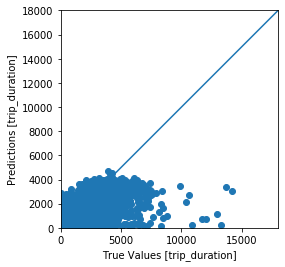

In [0]:
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_y, pred)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 18000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
diff = pred - test_y
percentDiff = diff/test_y * 100
abspercentDif = np.abs(percentDiff)
mean = np.mean(abspercentDif)
std = np.std(abspercentDif)

In [0]:
print(std)
print(mean)

NameError: ignored

In [0]:
from keras import backend as K

prova = np.sqrt(np.mean(np.square(np.log(pred + 1) - np.log(test_y + 1)), axis=-1))
prova

0.3814577736848384

In [0]:
K.mean(K.square(pred - test_y))

<tf.Tensor 'Mean_13:0' shape=() dtype=float64>

In [0]:
df = pd.DataFrame(list(zip(pred, test_y)))
df.head(100)

,0,1
0,831.669373,812
1,925.405823,913
2,1611.004395,1737
3,2272.183594,2176
4,1286.444336,1290
...,...,...
95,328.097992,272
96,918.071655,870
97,851.085571,824
98,1341.000977,1297


In [0]:
df.to_csv("/content/res.csv", index=False)

#prova con autokeras

In [0]:
!pip3 install autokeras

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for autokeras: filename=autokeras-1.0.0-cp36-none-any.whl size=49941 sha256=2676ebe4c743f3c7662420803c8b1b9f0a4cf257fc6fb9b92c901b38136b8bc9
  Stored in directory: /root/.cache/pip/wheels/63/f6/36/1816c7fc394f57469c63eb7c0ef5d92a492d679af5985fed4e
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73199 sha256=5c3a3bf54bc3d5ea7dd40165e3413f45a35c60a861330ff1971aeff59841477d
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15354 sha256=c975703cd02a87efc762999a3aae216ea90d825eb8d1510c50698ef7ccc414aa
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built autokeras keras-tuner terminaltables


In [0]:
%tensorflow_version 2.x
import tensorflow
import autokeras as ak

StructuredDataRegressor = ak.StructuredDataRegressor(
    column_names=None,
    column_types=None,
    output_dim=None,
    loss="mean_squared_error",
    metrics=None,
    name="structured_data_regressor",
    max_trials=2,
    directory=None,
    objective="val_loss",
    overwrite=True,
    seed=None,
)

TensorFlow 2.x selected.


In [0]:
model = StructuredDataRegressor.fit(
    x=train_scaled_x, y=np.log(train_y + 1), epochs=1, validation_split=0.2
)


Train for 29015 steps, validate for 7254 steps
29015/29015 [==============================] - 1210s 42ms/step - loss: 0.1409 - mean_squared_error: 0.1409 - val_loss: 0.1435 - val_mean_squared_error: 0.1435


Train for 29015 steps, validate for 7254 steps
Buffered data was truncated after reaching the output size limit.

#Predict on test_set

##Create test_set

In [0]:
!pip install kaggle
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [0]:
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

import kaggle
!kaggle competitions download -c nyc-taxi-trip-duration

!mkdir train
!unzip train.zip -d train

!mkdir test
!unzip test.zip -d test

Saving kaggle.json to kaggle.json
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49

In [0]:
test = pd.read_csv("/content/test/test.csv")
test.shape

(625134, 9)

In [0]:
!kaggle datasets list

!kaggle datasets download -d mathijs/weather-data-in-new-york-city-2016
!mkdir weather
!unzip weather-data-in-new-york-city-2016.zip -d weather

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType
weather-data-in-new-york-city-2016.zip: Skipping, found more recently modified lo

In [0]:
weather = pd.read_csv("/content/weather/weather_data_nyc_centralpark_2016(1).csv")

In [0]:
# join weather dataset with new york city taxi trip duration
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['date'] = test['pickup_datetime'].dt.date
weather['date'] = pd.to_datetime(weather.date)
weather['date'] = weather['date'].dt.date
data_with_weather = pd.merge(weather, test, how='right', on=['date'])

In [0]:
data_with_weather['maximum temperature'] = (data_with_weather['maximum temperature'] - 32) / 1.8
data_with_weather['minimum temperature'] = (data_with_weather['minimum temperature'] - 32) / 1.8
data_with_weather['average temperature'] = (data_with_weather['average temperature'] - 32) / 1.8

data_with_weather.loc[data_with_weather.precipitation == 'T', 'precipitation'] = '0.005'

data_with_weather = data_with_weather.rename(columns={'snow fall':'snow_fall', 
                      'snow depth':'snow_depth', 
                      'maximum temperature':'maximum_temperature', 
                      'minimum temperature':'minimum_temperature',
                      'average temperature':'average_temperature'})

data_with_weather.loc[data_with_weather.snow_fall == 'T', 'snow_fall'] = '0.1'
data_with_weather.loc[data_with_weather.snow_depth == 'T', 'snow_depth'] = '0.5'

data_with_weather['precipitation'] = pd.to_numeric(data_with_weather['precipitation'])
data_with_weather['snow_fall'] = pd.to_numeric(data_with_weather['snow_fall'])
data_with_weather['snow_depth'] = pd.to_numeric(data_with_weather['snow_depth'])

# trasformazione da inches a centimetri di snow_fall, snow_depth, precipitation
data_with_weather['precipitation'] = data_with_weather['precipitation'] * 2.54
data_with_weather['snow_fall'] = data_with_weather['snow_fall'] * 2.54
data_with_weather['snow_depth'] = data_with_weather['snow_depth'] * 2.54

In [0]:
!kaggle datasets list
!kaggle datasets download -d oscarleo/new-york-city-taxi-with-osrm
!mkdir osm
!unzip new-york-city-taxi-with-osrm.zip -d osm
!rm osm/test.csv
!rm osm/train.csv

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType
 97% 497M/515M [00:05<00:00, 83.4MB/s]
100% 515M/515M [00:05<00:00, 100MB/s] 
Arc

In [0]:
osm = pd.read_csv("/content/osm/fastest_routes_test.csv")


In [0]:
test_weather_osm = pd.merge(osm, data_with_weather, how='right', on=['id'])

In [0]:
test_weather_osm.shape

(625134, 27)

In [0]:
import geopy.distance
from numba import jit
import time
start = time.time()

jfk_coord = (40.639722, -73.778889)
la_guardia_coord = (40.77725, -73.872611)

distance_jfk_start = []
distance_jfk_end = []
distance_guardia_start = []
distance_guardia_end = []
for index, row in test_weather_osm.iterrows():
  distance_jfk_start.append(geopy.distance.distance(jfk_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_jfk_end.append(geopy.distance.distance(jfk_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)

  distance_guardia_start.append(geopy.distance.distance(la_guardia_coord, (row.pickup_latitude, row.pickup_longitude)).km)
  distance_guardia_end.append(geopy.distance.distance(la_guardia_coord, (row.dropoff_latitude, row.dropoff_longitude)).km)
end = time.time()
print(end-start)

test_weather_osm['JFK_start'] = distance_jfk_start
test_weather_osm['JFK_start'] = test_weather_osm['JFK_start'] < 2

test_weather_osm['JFK_end'] = distance_jfk_end
test_weather_osm['JFK_end'] = test_weather_osm['JFK_end'] < 2

test_weather_osm['guardia_start'] = distance_guardia_start
test_weather_osm['guardia_start'] = test_weather_osm['guardia_start'] < 2

test_weather_osm['guardia_end'] = distance_guardia_end
test_weather_osm['guardia_end'] = test_weather_osm['guardia_end'] < 2


755.4347522258759


In [0]:
test_weather_osm['pickup_hour'] = test_weather_osm['pickup_datetime'].dt.hour
test_weather_osm['pickup_minute'] = test_weather_osm['pickup_datetime'].dt.minute
test_weather_osm['pickup_day_week'] = test_weather_osm['pickup_datetime'].dt.dayofweek

In [0]:
test_weather_osm.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list,date,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,id0771704,6th Avenue,10th Avenue,1497.1,200.2,7,6th Avenue|West 17th Street|9th Avenue|9th Ave...,188.7|825.1|96.4|58.6|267.5|60.7|0,32.4|103.7|12.7|10.7|34|6.7|0,depart|turn|turn|continue|turn|turn|arrive,left|left|left|slight right|right|right|arrive,"-73.996527,40.737786|-73.995446,40.739272|-74....",2016-03-05,13.333333,10.555556,11.944444,1.5494,0.0,0.00,1,2016-03-05 13:02:04,1,-73.996689,40.737854,-74.007477,40.743362,N,False,False,False,False,13,2,5
1,id3274209,5th Avenue,5th Avenue,1427.1,141.5,2,5th Avenue|5th Avenue,1427.1|0,141.5|0,depart|arrive,none|arrive,"-73.976974,40.75885|-73.98516,40.747618",2016-05-27,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,2016-05-27 18:45:19,1,-73.976974,40.758850,-73.985245,40.747654,N,False,False,False,False,18,45,4
2,id2756455,East 18th Street,Park Avenue,2312.3,324.6,9,East 18th Street|Irving Place|East 19th Street...,19.3|74.1|148.9|632.1|163.9|1111.5|144.7|17.7|0,9.6|15.6|20.7|92.1|24.4|136.2|24.9|1.1|0,depart|turn|turn|turn|turn|turn|turn|turn|arrive,left|left|left|right|left|right|right|right|ar...,"-73.987161,40.736551|-73.986961,40.736466|-73....",2016-02-18,2.222222,-2.777778,-0.277778,0.0000,0.0,0.00,2,2016-02-18 00:48:54,5,-73.987106,40.736626,-73.978432,40.751400,N,False,False,False,False,0,48,3
3,id3684027,Madison Avenue,6th Avenue,931.8,84.2,4,Madison Avenue|East 49th Street|6th Avenue|6th...,199.3|466.6|265.8|0,24.4|36.5|23.3|0,depart|turn|turn|arrive,right|left|right|arrive,"-73.977191,40.755664|-73.976045,40.757232|-73....",2016-01-29,5.000000,-1.111111,1.944444,0.0000,0.0,15.24,1,2016-01-29 08:20:41,1,-73.977013,40.755589,-73.979408,40.761387,N,False,False,False,False,8,20,4
4,id3101285,Madison Avenue,West 83rd Street,2501.7,294.7,8,Madison Avenue|East 91st Street|5th Avenue|86t...,31|154.9|491|907.6|272.1|248|397.2|0,9.4|29.7|46|103.6|25.1|21.8|59.1|0,depart|turn|turn|turn|new name|turn|turn|arrive,right|left|left|right|straight|left|right|arrive,"-73.956667,40.783797|-73.956489,40.784041|-73....",2016-05-27,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,2016-05-27 13:37:37,3,-73.956459,40.783710,-73.977722,40.786270,N,False,False,False,False,13,37,4


In [0]:
test_weather_osm.loc[test_weather_osm.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = '0'
test_weather_osm.loc[test_weather_osm.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = '1'

test_weather_osm = test_weather_osm.drop(columns=['date', 'pickup_datetime', 'starting_street', 'end_street', 'street_for_each_step', 'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 'step_direction', 'step_location_list'])
test_weather_osm= test_weather_osm.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])



In [0]:
test_weather_osm.head()

,id,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,id0771704,1497.1,200.2,7,13.333333,10.555556,11.944444,1.5494,0.0,0.00,1,1,0,False,False,False,False,13,2,5
1,id3274209,1427.1,141.5,2,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,1,0,False,False,False,False,18,45,4
2,id2756455,2312.3,324.6,9,2.222222,-2.777778,-0.277778,0.0000,0.0,0.00,2,5,0,False,False,False,False,0,48,3
3,id3684027,931.8,84.2,4,5.000000,-1.111111,1.944444,0.0000,0.0,15.24,1,1,0,False,False,False,False,8,20,4
4,id3101285,2501.7,294.7,8,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,3,0,False,False,False,False,13,37,4


In [0]:
test_weather_osm.shape


(625134, 20)

In [0]:
test_weather_osm.to_csv("/content/test_weather_osm.csv", index=False)
!cp /content/test_weather_osm.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"

##Predict

In [0]:
test_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/test_weather_osm.csv")
test_weather_osm = test_weather_osm.drop(columns=['id'])

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

test_weather_osm_array = np.array(test_weather_osm)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_weather_osm_scaled_x = scaler.fit_transform(test_weather_osm_array)

In [0]:
pred = model.predict(test_weather_osm_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

AttributeError: ignored

In [0]:
test_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/test_weather_osm.csv")

test_weather_osm['trip_duration'] = pred.tolist()

test_weather_osm[['id', 'trip_duration']].to_csv('neural_submission.csv', index=False)
!cp /content/neural_submission.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"


In [0]:
test_weather_osm.shape

(625134, 21)